<a href="https://colab.research.google.com/github/JiggaSaviola/Predicting-Nigerian-Property-Prices.A-Machine-Learning-Approach/blob/main/NPP_MLA_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [ ]:


df=pd.read_csv('/content/gROUP 2 ML  PROJECT FILE.csv')
display(df.head())


,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000.0
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  int64  
 1   bathrooms      24326 non-null  int64  
 2   toilets        24326 non-null  int64  
 3   parking_space  24326 non-null  int64  
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.5+ MB


None

In [ ]:
df.isnull().sum()

,0
bedrooms,0
bathrooms,0
toilets,0
parking_space,0
title,0
town,0
state,0
price,0
log_price,0


In [ ]:
df.shape

(24326, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  int64  
 1   bathrooms      24326 non-null  int64  
 2   toilets        24326 non-null  int64  
 3   parking_space  24326 non-null  int64  
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  int64  
 8   log_price      24326 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 1.7+ MB


In [ ]:
df.describe()

,bedrooms,bathrooms,toilets,parking_space,price,log_price
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04,24326.000000
mean,4.338814,4.600798,5.176355,4.041725,3.013802e+08,18.350852
std,1.138497,1.163161,1.226253,1.399936,1.220403e+10,1.056992
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04,11.407565
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07,17.766754
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07,18.258162
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08,18.890684
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12,28.218808


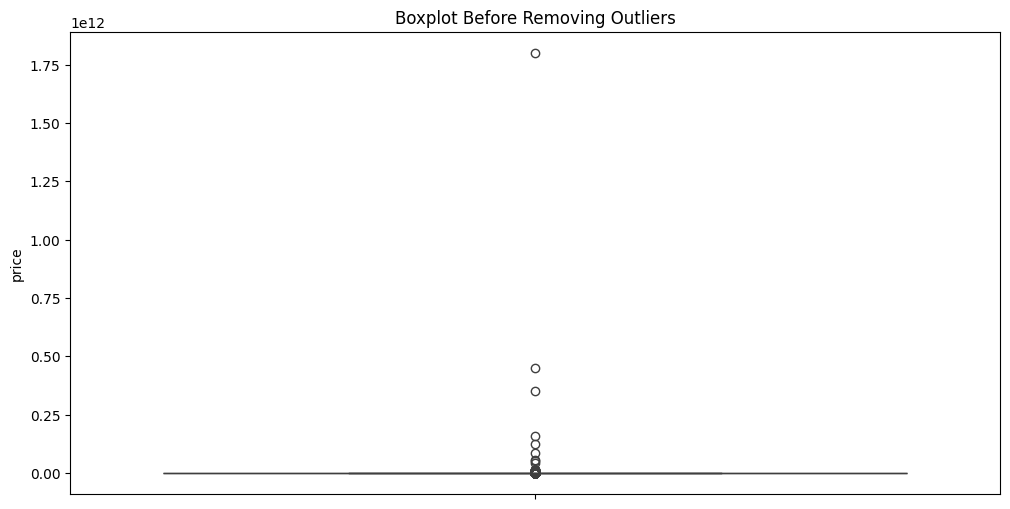

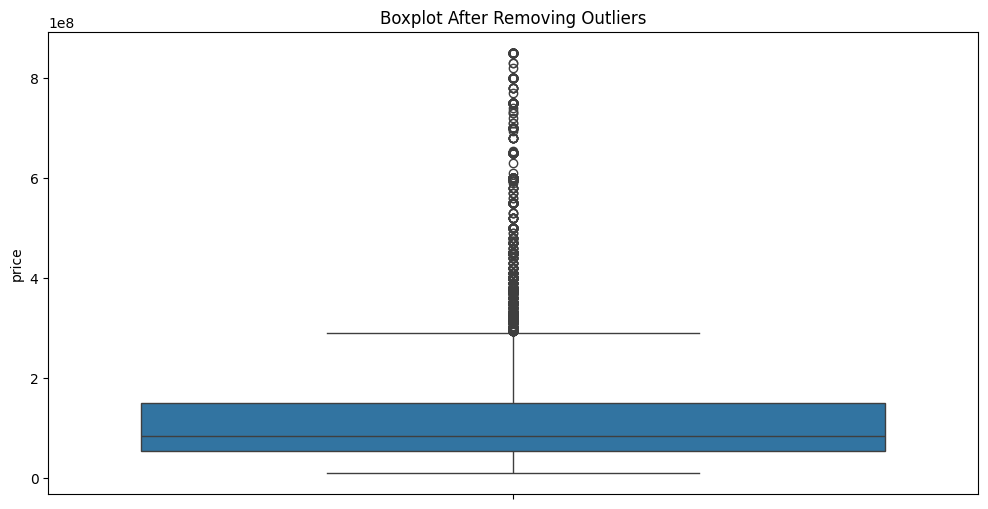

In [ ]:


# Visualizing Before Removing Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['price'])  # Use the 'price' column
plt.title("Boxplot Before Removing Outliers")
plt.show()

# Visualizing After Removing Outliers
# Cleaned dataframe 'df_cleaned' for visualization after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(y=df_cleaned['price'])  # Use the 'price' column from the cleaned data
plt.title("Boxplot After Removing Outliers")
plt.show()

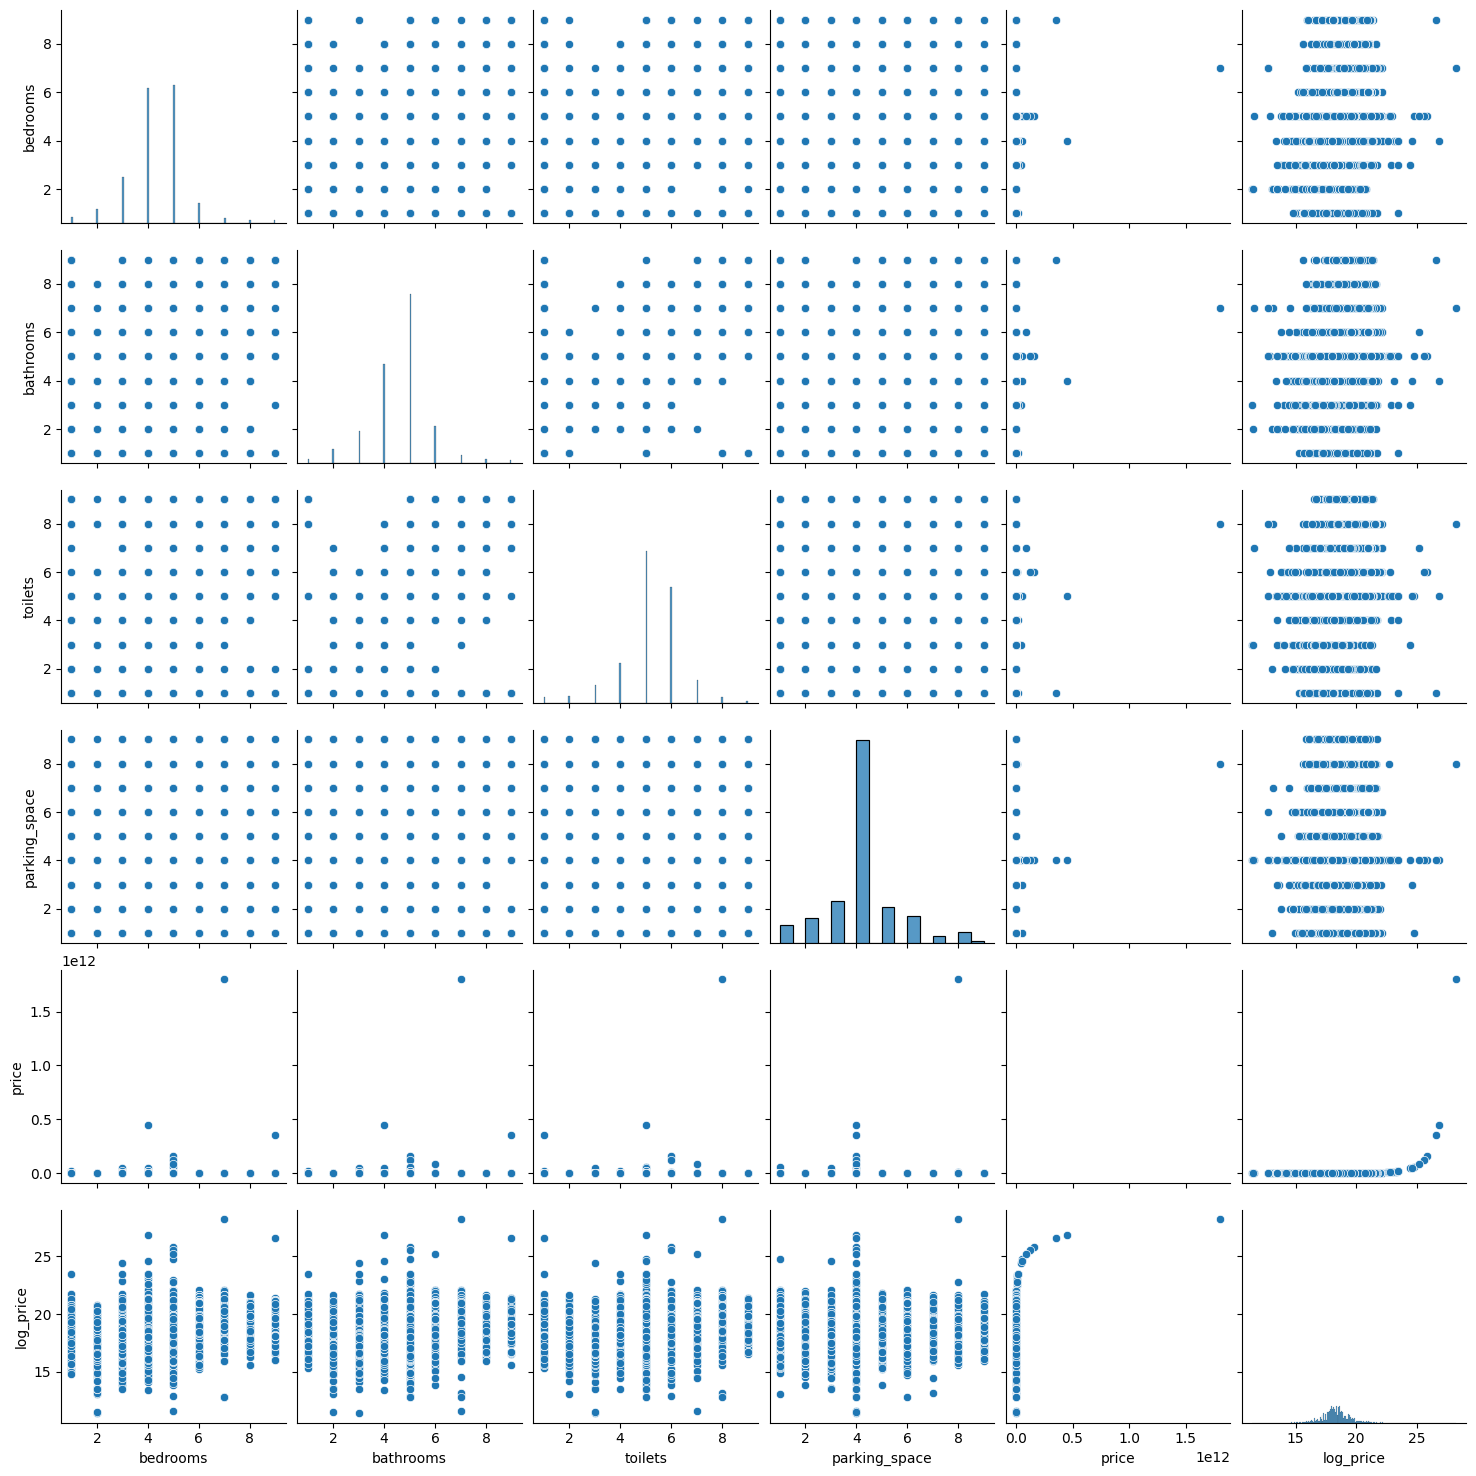

In [ ]:

sns.pairplot(df)

/tmp/ipython-input-872805753.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

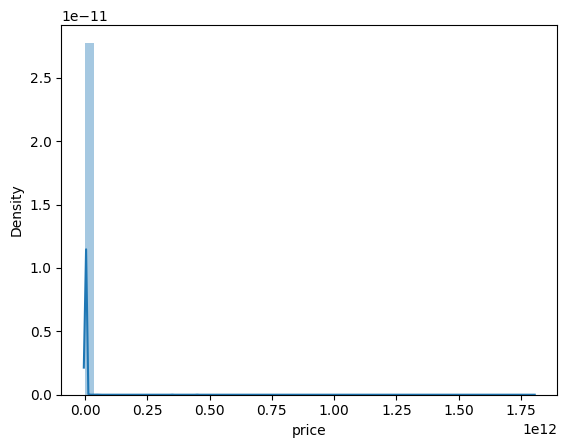

In [ ]:
# Displot with the outliers
sns.distplot(df['price'])

In [ ]:
# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)

# Calculate and display the correlation matrix
display(numeric_df.corr())

,bedrooms,bathrooms,toilets,parking_space,price,log_price
bedrooms,1.000000,0.726557,0.610501,0.158528,0.025734,0.516773
bathrooms,0.726557,1.000000,0.719102,0.174129,0.021965,0.423917
toilets,0.610501,0.719102,1.000000,0.225345,0.015486,0.452898
parking_space,0.158528,0.174129,0.225345,1.000000,0.018370,0.135283
price,0.025734,0.021965,0.015486,0.018370,1.000000,0.107699
log_price,0.516773,0.423917,0.452898,0.135283,0.107699,1.000000


<Axes: >

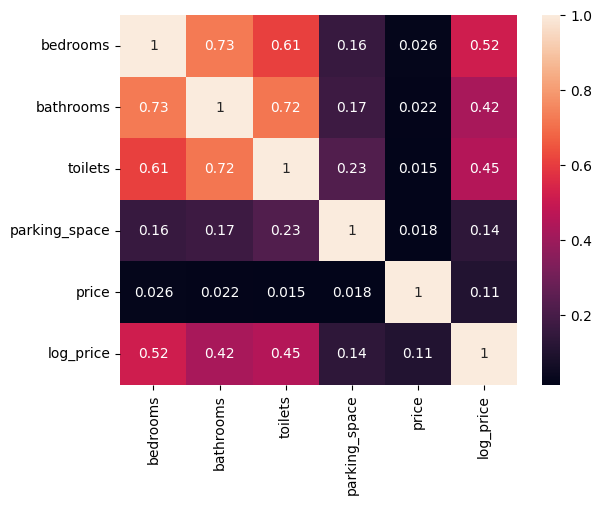

In [ ]:
# Numeric columns for the heatmap
numeric_df_for_heatmap = df.select_dtypes(include=np.number)

# Heatmap
sns.heatmap(numeric_df_for_heatmap.corr(), annot=True)

In [ ]:
df.columns

Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town',
       'state', 'price', 'log_price'],
      dtype='object')

In [ ]:

# A list of named feature_columns containing the names of the columns we want to use as input features (X) for the model.
feature_columns = ['bedrooms', 'bathrooms', 'toilets', 'parking_space']

# DataFrame df for only the columns listed in feature_columns. This creates the feature matrix X.
X = df[feature_columns]

#Inspection: The first 5 rows of the new feature matrix X to quickly verify the column selection was correct.
X.head()

,bedrooms,bathrooms,toilets,parking_space
0,6,5,5,4
1,4,5,5,4
2,4,5,5,4
3,4,4,5,6
4,4,4,5,2


In [ ]:
df = pd.read_csv('/content/data_without_all_outliers.csv')
display(df.head())
display(df.info())


,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,log_price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000,19.924758
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000,20.500122
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000,18.603002
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000,17.504390
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000,18.132999


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23156 entries, 0 to 23155
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       23156 non-null  int64  
 1   bathrooms      23156 non-null  int64  
 2   toilets        23156 non-null  int64  
 3   parking_space  23156 non-null  int64  
 4   title          23156 non-null  object 
 5   town           23156 non-null  object 
 6   state          23156 non-null  object 
 7   price          23156 non-null  int64  
 8   log_price      23156 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 1.6+ MB


None

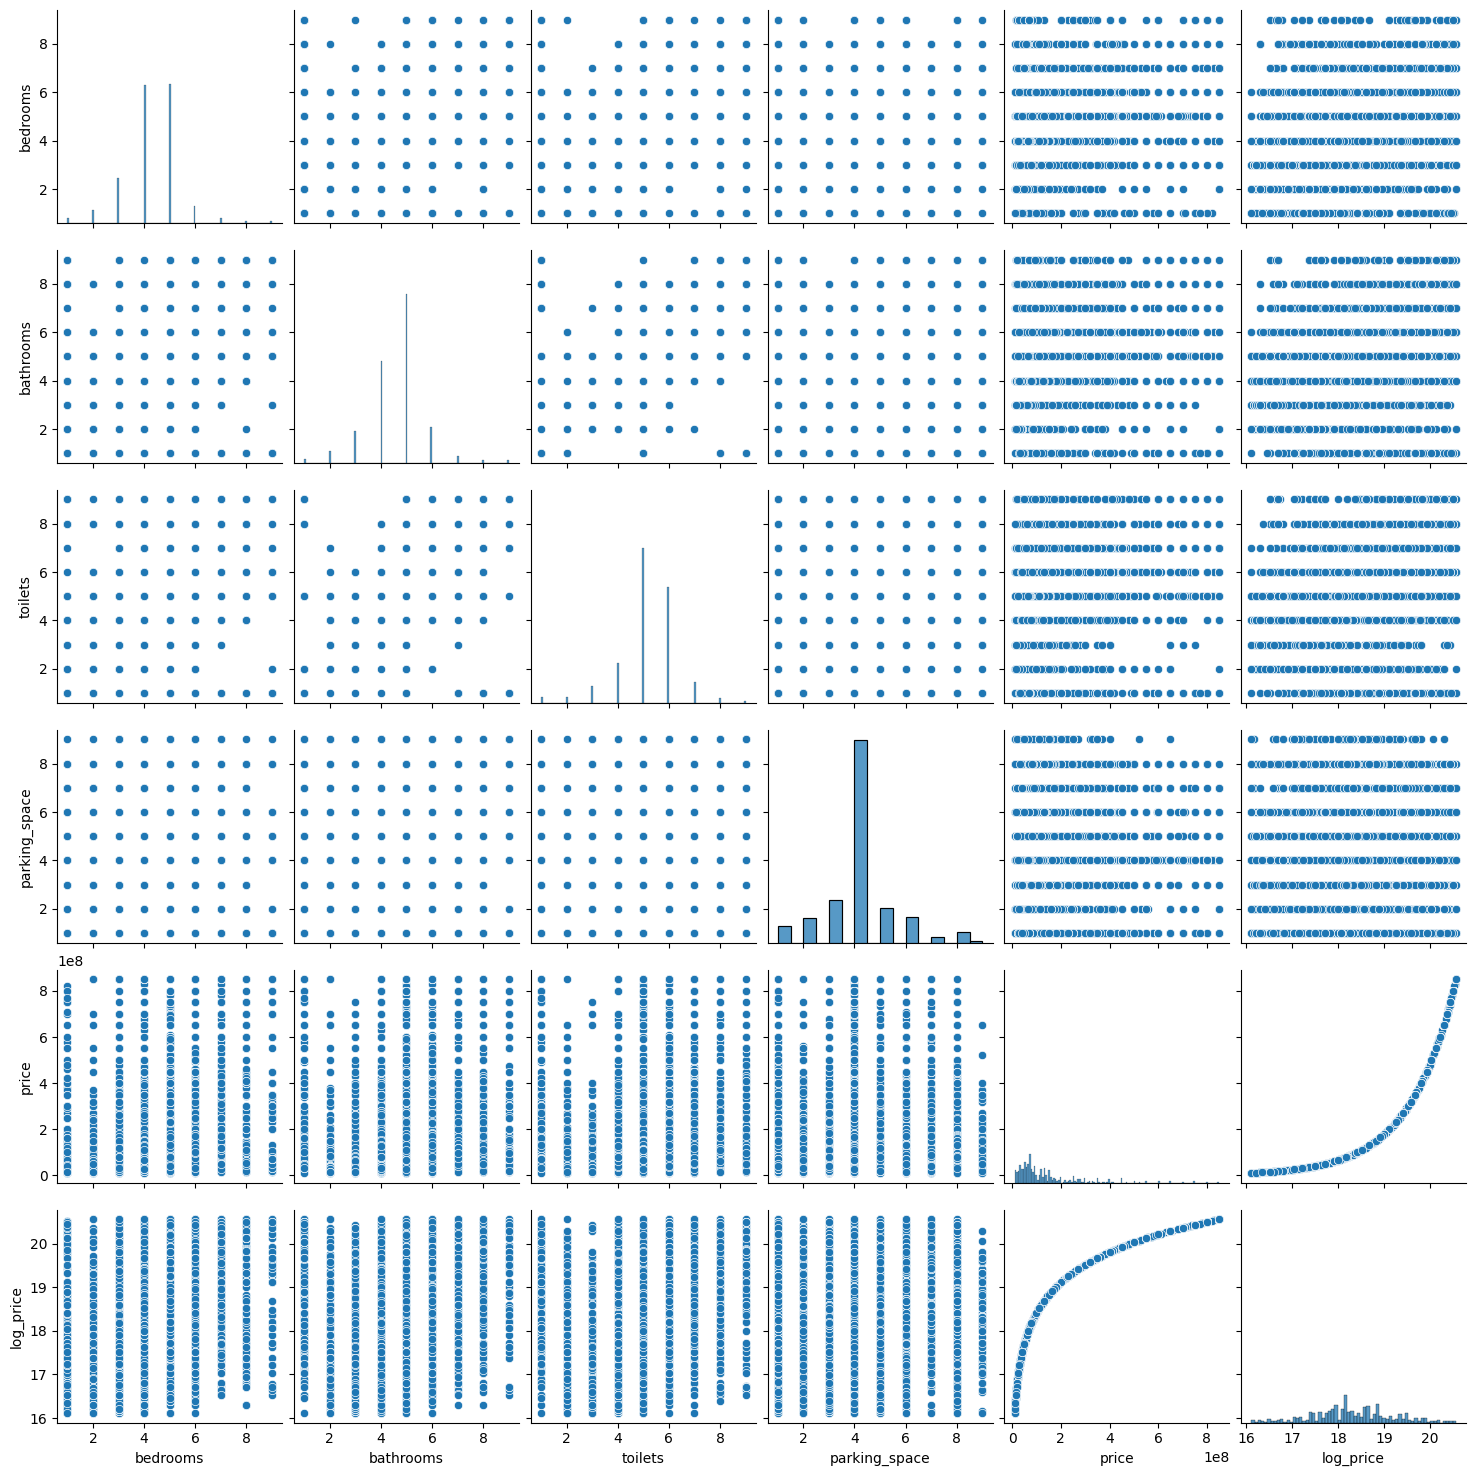

In [ ]:
# Pairplot without Outliers

sns.pairplot(df)

In [ ]:
df.shape

(23156, 9)

/tmp/ipython-input-2933688261.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

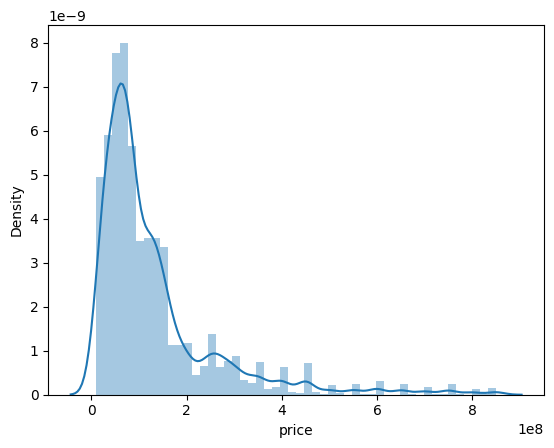

In [ ]:
#Displot without Outliers

sns.distplot(df['price'])

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


# --- Re-Define Data Setup Function (for iterative use) ---
def get_processed_data():
    df = pd.read_csv("gROUP 2 ML  PROJECT FILE.csv")
    df['price'] = df['price'].astype(int)
    df['log_price'] = np.log(df['price'])




# --- Iterative VIF Removal ---
X_vif, df_cleaned_for_vif = get_processed_data() # Get both X and df_cleaned
features_to_drop = []
max_vif_threshold = 10.0 # Standard threshold

# Highest VIF is below the threshold after Looping
while True:
    X_current = X_vif.drop(columns=features_to_drop, errors='ignore')

    # Intercept for VIF calculation
    X_current['Intercept'] = 1

    #  VIF Calculated
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_current.columns
    # Ensure the data is treated as numeric before calculating VIF
    vif_data["VIF"] = [variance_inflation_factor(X_current.values.astype(float), i)
                        for i in range(X_current.shape[1])]




Dropping: state_Lagos (VIF: 464.86)

--- Final Multicollinearity Check (VIF < 10) ---
Total features dropped: 1
Features dropped: ['state_Lagos']

Final VIF Scores for Remaining Features:
| Feature                      |   VIF |
|:-----------------------------|------:|
| title_Detached Duplex        |  5.59 |
| title_Terraced Duplexes      |  2.92 |
| bathrooms                    |  2.86 |
| title_Semi Detached Duplex   |  2.67 |
| bedrooms                     |  2.63 |
| toilets                      |  2.31 |
| title_Detached Bungalow      |  2.06 |
| title_Semi Detached Bungalow |  1.24 |
| title_Terraced Bungalow      |  1.10 |
| parking_space                |  1.10 |
| state_Abuja                  |  1.08 |
| state_Ogun                   |  1.06 |
| state_Oyo                    |  1.04 |
| state_Imo                    |  1.02 |
| state_Rivers                 |  1.02 |
| state_Anambara               |  1.02 |
| state_Edo                    |  1.02 |
| state_Kaduna                 | 

In [ ]:
 # Outlier removal (as done previously)
    Q1 = df['log_price'].quantile(0.25)
    Q3 = df['log_price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound_log = Q1 - 1.5 * IQR
    upper_bound_log = Q3 + 1.5 * IQR
    df_cleaned = df[(df['log_price'] >= lower_bound_log) & (df['log_price'] <= upper_bound_log)].copy()

In [ ]:
# One-Hot Encoding
    features_to_encode = ['title', 'state']
    df_encoded = pd.get_dummies(df_cleaned, columns=features_to_encode, drop_first=True)

    # Convert boolean columns to integer (0 or 1)
    for col in df_encoded.columns:
        if df_encoded[col].dtype == bool:
            df_encoded[col] = df_encoded[col].astype(int)

    # Start with all potential features (excluding non-features)
    X = df_encoded.drop(columns=['price', 'log_price', 'town'])
    return X, df_cleaned # Also return df_cleaned for accessing log_price



In [ ]:
 vif_data = vif_data.sort_values(by='VIF', ascending=False)

    # Find the max VIF (excluding Intercept)
    max_vif_row = vif_data[vif_data['Feature'] != 'Intercept'].iloc[0]

    if max_vif_row['VIF'] > max_vif_threshold:
        feature_to_remove = max_vif_row['Feature']
        features_to_drop.append(feature_to_remove)
        print(f"Dropping: {feature_to_remove} (VIF: {max_vif_row['VIF']:.2f})")
    else:
        break # Exit loop when threshold is met

# --- Final Results ---
print("\n--- Final Multicollinearity Check (VIF < 10) ---")
print(f"Total features dropped: {len(features_to_drop)}")
print(f"Features dropped: {features_to_drop}")
print("\nFinal VIF Scores for Remaining Features:")
print(vif_data[vif_data['Feature'] != 'Intercept'].to_markdown(index=False, floatfmt=".2f"))

# --- Final Training Data Setup ---
final_features = X_vif.drop(columns=features_to_drop)
# Use the df_cleaned returned from the function to get the target variable
final_target = df_cleaned_for_vif['log_price']


print("\n--- Training Data is ready for Model Re-run ---")
print(f"Number of remaining features (X): {final_features.shape[1]}")

In [ ]:
#x = df.drop(['price'],axis=1)
#x

y = df['price']
y.head()

,price
0,450000000
1,800000000
2,120000000
3,40000000
4,75000000


In [ ]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_features, final_target, test_size=0.3, random_state=75)

In [ ]:
# pipeline with scaling

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('linreg', LinearRegression())
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [ ]:
# Model Evaluation

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 0.4886578993327134
RMSE: 0.6314293787696592
R²: 0.47060938122590945


In [ ]:
# Coefficients (with Scaling)
# This ensures comparability across features (scaled).
# Still interpretable if we check original coefficients separately.


# Extracted coefficients
scaler = pipe.named_steps['scaler']
linreg = pipe.named_steps['linreg']

# Note: Interpreting coefficients directly after scaling requires inverse transforming, which is complex.
# The coefficients from the linear model on scaled data show the impact in standard deviation units.
# For interpretation in original units, a different approach or refitting on unscaled data might be needed.
# Keeping the original interpretation structure for now, but note the complexity.

coef = linreg.coef_
intercept = linreg.intercept_


coef_table = pd.DataFrame({
    "Feature": final_features.columns,
    "Coefficient": coef,
    "Interpretation": [
        f"Change in Log Price for one standard deviation increase in {col} (holding others constant)"
        for col in final_features.columns
    ]
})


print("Intercept:", intercept)
print(coef_table)

Intercept: 18.323646067664047
                         Feature   Coefficient  \
0                       bedrooms  2.427261e-01   
1                      bathrooms -3.899890e-02   
2                        toilets  1.196914e-01   
3                  parking_space  2.311182e-02   
4        title_Detached Bungalow -1.926501e-01   
5          title_Detached Duplex  1.484784e-01   
6   title_Semi Detached Bungalow -8.372473e-02   
7     title_Semi Detached Duplex  8.913688e-03   
8        title_Terraced Bungalow -3.669794e-02   
9        title_Terraced Duplexes -2.227296e-02   
10                   state_Abuja  1.756935e-02   
11               state_Akwa Ibom -1.951556e-02   
12                state_Anambara -7.476827e-05   
13                 state_Bayelsa -3.096286e-03   
14                   state_Borno  3.783306e-03   
15             state_Cross River -1.801603e-02   
16                   state_Delta -1.479764e-02   
17                     state_Edo -4.024959e-02   
18                  

In [ ]:
# Instantiate your model

lr = LinearRegression()

In [ ]:
X_train.shape

(16209, 33)

In [ ]:
X_test.shape

(6947, 33)

In [ ]:
# Model fitting/training

lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# intercept : where the x and y axis meet

print(lr.intercept_)

16.881161802700568


In [ ]:
lr.coef_

array([ 2.20127814e-01, -3.44238213e-02,  1.00603657e-01,  1.65672444e-02,
       -7.12815011e-01,  3.00269230e-01, -6.62683585e-01,  2.81591937e-02,
       -4.51086240e-01, -6.44072561e-02,  4.94766028e-02, -7.17512194e-01,
       -1.00068475e-03, -3.94214528e-01,  3.40613131e-01, -1.62199308e+00,
       -3.10074349e-01, -6.52042442e-01, -9.48489159e-02, -3.00439741e-01,
       -3.00150164e-01, -4.58872923e-01, -2.18089290e-01, -4.99600361e-16,
       -9.83154715e-01, -1.16625603e+00, -9.28599393e-01, -2.22044605e-16,
       -8.10072244e-01, -5.91885133e-01, -6.19847054e-01, -1.94196662e+00,
       -3.95058934e-01])

In [ ]:
#creating a dataframe for the coefficience

df1_coeff = pd.DataFrame(lr.coef_, final_features.columns, columns=['coeff'])

In [ ]:
df1_coeff

,coeff
bedrooms,2.201278e-01
bathrooms,-3.442382e-02
toilets,1.006037e-01
parking_space,1.656724e-02
title_Detached Bungalow,-7.128150e-01
title_Detached Duplex,3.002692e-01
title_Semi Detached Bungalow,-6.626836e-01
title_Semi Detached Duplex,2.815919e-02
title_Terraced Bungalow,-4.510862e-01
title_Terraced Duplexes,-6.440726e-02


In [ ]:
# To check machine prediction
predictions =lr.predict(X_test)
print(predictions)

[18.47696702 18.51010151 17.11938461 ... 18.74541809 18.5393519
 17.74194647]


In [ ]:
print(y_test)

7105     18.197537
11479    18.132999
5191     16.588099
12820    17.529083
1409     19.468000
           ...    
19594    18.603002
1975     17.622173
19884    18.132999
23873    18.132999
5755     17.504390
Name: log_price, Length: 6947, dtype: float64


In [ ]:
#Comparing the prediction with the y_test

price_comparison = pd.DataFrame({"Predicted Prices": predictions, "Actual Price": y_test})
price_comparison

,Predicted Prices,Actual Price
7105,18.476967,18.197537
11479,18.510102,18.132999
5191,17.119385,16.588099
12820,17.530581,17.529083
1409,18.761985,19.468000
...,...,...
19594,18.493534,18.603002
1975,17.242984,17.622173
19884,18.745418,18.132999
23873,18.539352,18.132999


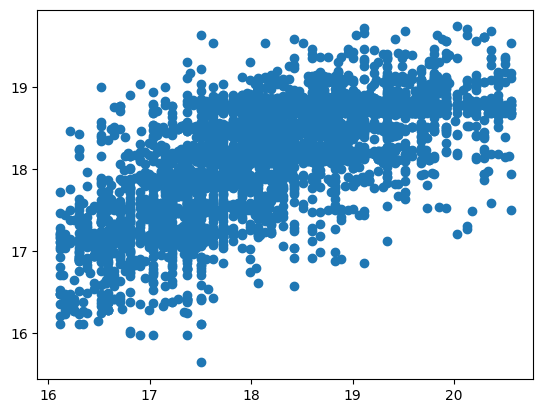

In [ ]:
plt.scatter(y_test, predictions)

/tmp/ipython-input-1766711204.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


Text(0.5, 1.0, 'Residuals')

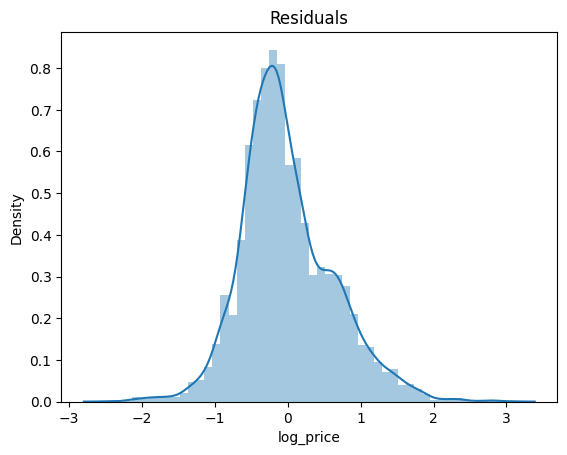

In [ ]:
sns.distplot(y_test-predictions)
plt.title("Residuals")

In [ ]:
# Residual Analysis

residuals = y_test - predictions
residuals

,log_price
7105,-0.279430
11479,-0.377103
5191,-0.531285
12820,-0.001499
1409,0.706014
...,...
19594,0.109468
1975,0.379189
19884,-0.612419
23873,-0.406353


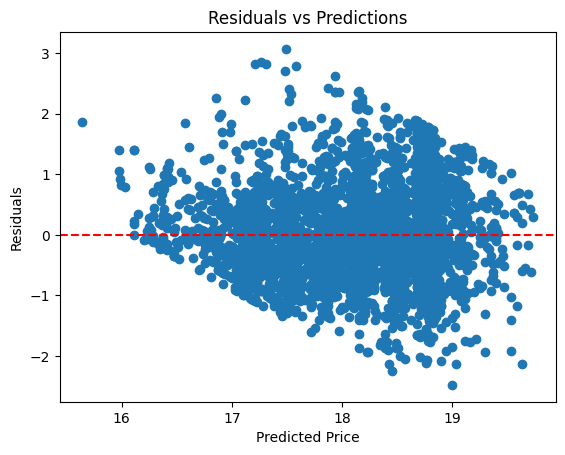

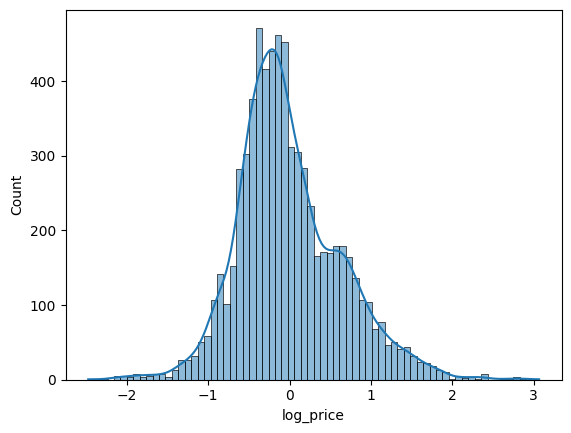

In [ ]:
residuals = y_test - predictions

# Residual scatter
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictions")
plt.show()

# Distribution
sns.histplot(residuals, kde=True)
plt.show()

In [ ]:
# cross Validation
# Prevents overfitting illusion from one split.

cv_r2 = cross_val_score(lr, final_features, final_target, cv=5, scoring='r2')
cv_rmse = np.sqrt(-cross_val_score(lr, final_features, final_target, cv=5, scoring='neg_mean_squared_error'))

print("CV R²:", cv_r2.mean())
print("CV RMSE:", cv_rmse.mean())

CV R²: 0.45011103409814923
CV RMSE: 0.6463626293509587


**INSIGHTS AND ANALYSIS**

##**Model Overview**

The Linear Regression model was trained on cleaned housing data to predict property prices across Nigerian states.

##**Model Performance**

R² = 0.4716 (46%) – Very low. The model explains only about 18% of price variation, leaving 82% unexplained.

MSE = ₦13.6 quadrillion – Extremely high, indicating large prediction errors even after data cleaning and log transformation.

###**Interpretation:**
The model poorly fits the data and performs inadequately for accurate price prediction.

**Understanding the Result**

An R² of 18% suggests that the model fails to capture most of the variability in housing prices. While such a value might be acceptable in exploratory or highly complex fields (like social sciences), it is not sufficient for predictive use in housing price modeling.
Additional diagnostics such as p-values, residual plots, and error metrics (RMSE, MAE) would further confirm the weak performance. Comparing results with a baseline model (predicting mean price) shows only marginal improvement.

##**Key Market Insights**

**Geography is the Dominant Factor:**

Most states have negative coefficients, meaning properties there are significantly cheaper than in the baseline state, Lagos.

The largest negative effects come from Ed0 (−1.65), Ogun(−1.81), Ekiti (−9.49), Nasarawa (−9.29), and Kogi (−9.83).

This confirms that Lagos drives higher price levels, while other states show strong price suppression effects.

**Property Type Also Matters:**

“Detached Bungalow (−7.13)” is the only non-location factor among the top influences, showing that property style also affects value.

Recommendations for Improvement

**To achieve stronger predictive accuracy:**

Feature Engineering: Add more descriptive features such as detailed location data, building age, proximity to amenities, and security level.

**Remove Irrelevant Variables:** Exclude features that do not significantly impact price.

**Check for Non-linearity:** Relationships may not be linear; test for curves or interactions.

**Ensure Data Quality:** Reassess outliers, missing values, and transformations.

**Try Advanced Models:** Replace Linear Regression with non-linear tree-based models such as Random Forest or Gradient Boosting Regressors, which can better capture complex, non-linear market behavior.

##**Conclusion**

While the Linear Regression model offers useful feature insights (e.g., state and property-type effects), it is not suitable for price prediction due to its low explanatory power.
A shift to more sophisticated, non-linear models will likely yield higher accuracy and better capture of Nigeria’s diverse housing market dynamics.